In [12]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.stats
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [2]:
from helpers import load_data, preprocess_data

path_dataset = "./data_train.csv"
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


In [3]:
csr = ratings.asformat("csr").copy()
dense = ratings.todense()

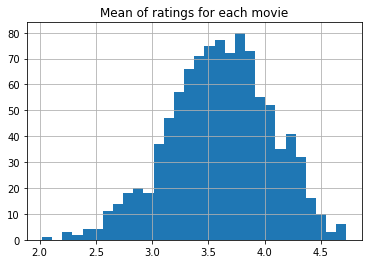

In [74]:
# Mean of ratings for each movie
means = []
for c in range(dense.shape[1]):
    col = dense[:,c]
    means.append(np.mean(col[col>0]))
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings for each movie');

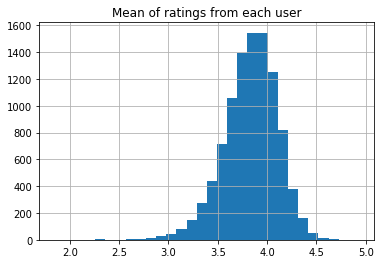

In [73]:
# Mean of ratings from each user
means = []
for r in range(dense.shape[0]):
    row = dense[r,:]
    means.append(np.mean(row[row>0]))
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings from each user');

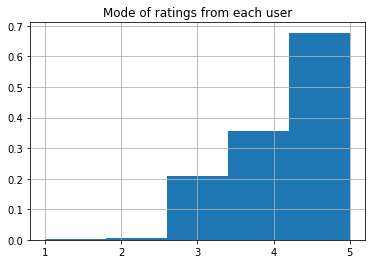

In [72]:
# Mode of ratings from each user
mode = []
for r in range(dense.shape[0]):
    row = dense[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

Total ratings are: 1176952


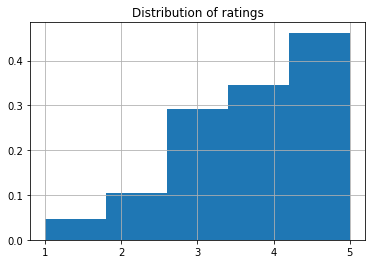

In [69]:
# Total ratings
print('Total ratings are: {}'.format(csr.count_nonzero()))

# Distribution of ratings
plt.hist(csr.data, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

## Bloggers

Treshold of ratings to be a blogger is: 252.71918505942264
Number of bloggers are: 467
Total ratings are: 140822


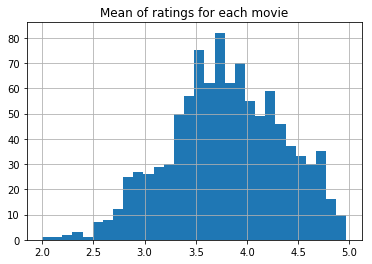

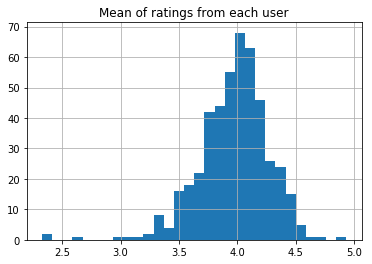

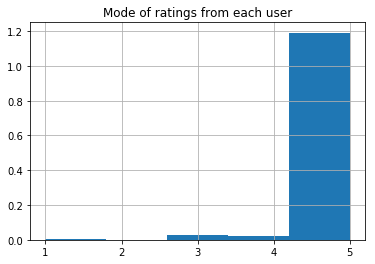

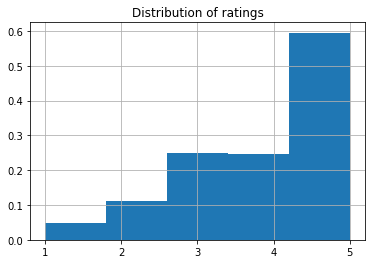

In [134]:
# Distribution of ratings for blogger

# Identify blogger as people with number of ratings > 0.95 (500 people)
num_rat = np.count_nonzero(dense.A, axis=1)
hist = np.histogram(num_rat)
rat_rand_val = scipy.stats.rv_histogram(hist)
blog_min_rat = rat_rand_val.ppf(0.95)
blogger_ind = np.where(num_rat>blog_min_rat)
blogger_rat = dense.A[blogger_ind]

# Print info
print('Treshold of ratings to be a blogger is: {}'.format(blog_min_rat))
print('Number of bloggers are: {}'.format(len(blogger_ind[0])))

# Mean of ratings for each movie
means = []
for c in range(blogger_rat.shape[1]):
    col = blogger_rat[:,c]
    means.append(np.mean(col[col>0]))
plt.figure()
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings for each movie');

# Mean of ratings from each user
means = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    means.append(np.mean(row[row>0]))
plt.figure()
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings from each user');

# Mode of ratings from each user
mode = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.figure()
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

# Total ratings
print('Total ratings are: {}'.format(np.count_nonzero(blogger_rat)))

# Distribution of ratings
plt.figure()
plt.hist(blogger_rat[blogger_rat>0].flatten(), bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

In [108]:
len(blogger_ind[0])

467

# New Users

Treshold of ratings to be a new_user is: 19.008636644046884
Number of new_users are: 115
Total ratings are: 1736


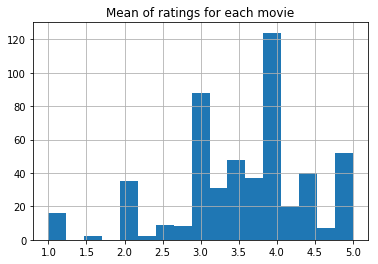

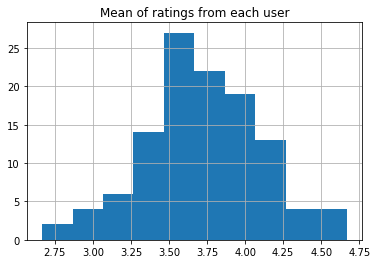

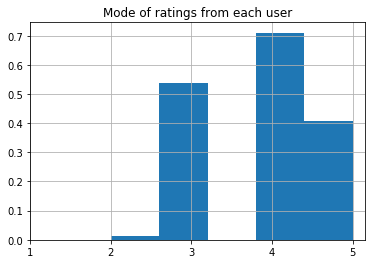

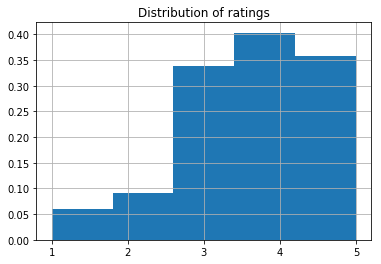

In [155]:
# Distribution of ratings for new users

# Identify ew users as people with number of ratings < 0.05
num_rat = np.count_nonzero(dense.A, axis=1)
hist = np.histogram(num_rat)
rat_rand_val = scipy.stats.rv_histogram(hist)
blog_min_rat = rat_rand_val.ppf(0.05)
blogger_ind = np.where(num_rat<blog_min_rat)
blogger_rat = dense.A[blogger_ind]

# Print info
print('Treshold of ratings to be a new_user is: {}'.format(blog_min_rat))
print('Number of new_users are: {}'.format(len(blogger_ind[0])))

# Mean of ratings for each movie
means = []
for c in range(blogger_rat.shape[1]):
    col = blogger_rat[:,c]
    if (col == 0).all():
        continue
    means.append(np.mean(col[col>0]))
plt.figure()
plt.hist(means, bins='auto');
plt.grid()
plt.title('Mean of ratings for each movie');

# Mean of ratings from each user
means = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    means.append(np.mean(row[row>0]))
plt.figure()
plt.hist(means);
plt.grid()
plt.title('Mean of ratings from each user');

# Mode of ratings from each user
mode = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.figure()
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

# Total ratings
print('Total ratings are: {}'.format(np.count_nonzero(blogger_rat)))

# Distribution of ratings
plt.figure()
plt.hist(blogger_rat[blogger_rat>0].flatten(), bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

## Normal Users

Treshold of ratings to be a new_user is: 252.71918505942264
Number of new_users are: 115
Total ratings are: 1034394


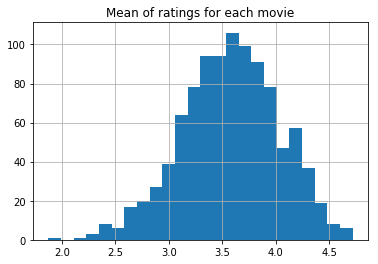

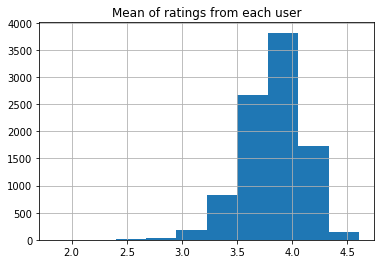

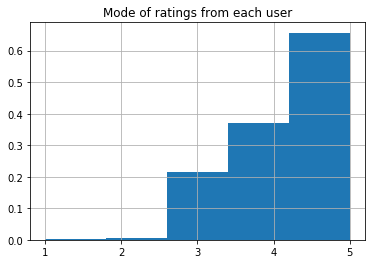

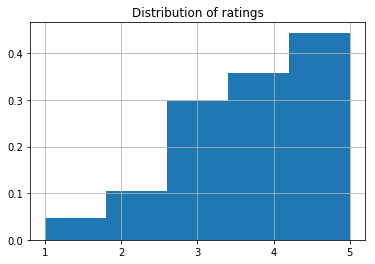

In [163]:
# Identify normal users
num_rat = np.count_nonzero(dense.A, axis=1)
hist = np.histogram(num_rat)
rat_rand_val = scipy.stats.rv_histogram(hist)
new_max_rat = rat_rand_val.ppf(0.05)
blog_min_rat = rat_rand_val.ppf(0.95)
normal_ind = np.where(np.logical_and(num_rat<blog_min_rat,num_rat>new_max_rat))
blogger_rat = dense.A[normal_ind]

# Print info
print('Treshold of ratings to be a new_user is: {}'.format(blog_min_rat))
print('Number of new_users are: {}'.format(len(blogger_ind[0])))

# Mean of ratings for each movie
means = []
for c in range(blogger_rat.shape[1]):
    col = blogger_rat[:,c]
    if (col == 0).all():
        continue
    means.append(np.mean(col[col>0]))
plt.figure()
plt.hist(means, bins='auto');
plt.grid()
plt.title('Mean of ratings for each movie');

# Mean of ratings from each user
means = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    means.append(np.mean(row[row>0]))
plt.figure()
plt.hist(means);
plt.grid()
plt.title('Mean of ratings from each user');

# Mode of ratings from each user
mode = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.figure()
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

# Total ratings
print('Total ratings are: {}'.format(np.count_nonzero(blogger_rat)))

# Distribution of ratings
plt.figure()
plt.hist(blogger_rat[blogger_rat>0].flatten(), bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

### Plot the number of ratings per movie and user

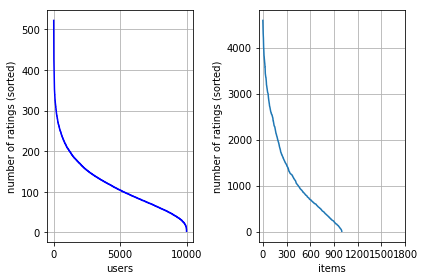

min # of ratings per movie = 8 
min # of ratings per user = 3.


In [40]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of ratings per movie = {} \nmin # of ratings per user = {}.".format(
        min(num_users_per_item), min(num_items_per_user)))

### Split the data into a train and test set

In [4]:
def split_data(ratings, num_items_per_user, num_users_per_item,
               min_num_ratings, p_test=0.1):
    """split the ratings to training data and test data.
    Args:
        min_num_ratings: 
            all users and items we keep must have at least min_num_ratings per user and per item. 
    """
    # set seed
    np.random.seed(988)
    
    # select user and item based on the condition.
    valid_users = np.where(num_items_per_user >= min_num_ratings)[0]
    valid_items = np.where(num_users_per_item >= min_num_ratings)[0]
    valid_ratings = ratings[valid_items, :][: , valid_users]  
    
    # init
    num_rows, num_cols = valid_ratings.shape
    train = sp.lil_matrix((num_rows, num_cols))
    test = sp.lil_matrix((num_rows, num_cols))
    
    print("the shape of original ratings. (# of row, # of col): {}".format(
        ratings.shape))
    print("the shape of valid ratings. (# of row, # of col): {}".format(
        (num_rows, num_cols)))

    nz_items, nz_users = valid_ratings.nonzero()
    
    # split the data
    for user in set(nz_users):
        # randomly select a subset of ratings
        row, col = valid_ratings[:, user].nonzero()
        selects = np.random.choice(row, size=int(len(row) * p_test))
        residual = list(set(row) - set(selects))

        # add to train set
        train[residual, user] = valid_ratings[residual, user]

        # add to test set
        test[selects, user] = valid_ratings[selects, user]

    print("Total number of nonzero elements in origial data:{v}".format(v=ratings.nnz))
    print("Total number of nonzero elements in train data:{v}".format(v=train.nnz))
    print("Total number of nonzero elements in test data:{v}".format(v=test.nnz))
    return valid_ratings, train, test

the shape of original ratings. (# of row, # of col): (10000, 1000)
the shape of valid ratings. (# of row, # of col): (9990, 999)
Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1065253
Total number of nonzero elements in test data:111620


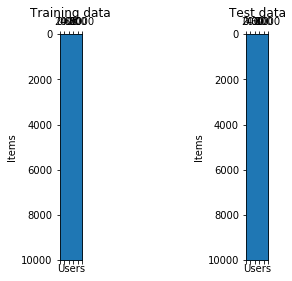

In [5]:
from plots import plot_train_test_data

valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)
plot_train_test_data(train, test)

## Implementing Baselines 

### Use the global mean to do the prediction

In [6]:
from helpers import calculate_mse

def baseline_global_mean(train, test):
    """baseline method: use the global mean."""
    # find the non zero ratings in the train
    nonzero_train = train[train.nonzero()]

    # calculate the global mean
    global_mean_train = nonzero_train.mean()

    # find the non zero ratings in the test
    nonzero_test = test[test.nonzero()].todense()

    # predict the ratings as global mean
    mse = calculate_mse(nonzero_test, global_mean_train)
    rmse = np.sqrt(1.0 * mse / nonzero_test.shape[1])
    print("test RMSE of baseline using the global mean: {v}.".format(v=rmse))

baseline_global_mean(train, test)

test RMSE of baseline using the global mean: [[ 1.12152228]].


### Use the user means as the prediction

In [7]:
def baseline_user_mean(train, test):
    """baseline method: use the user means as the prediction."""
    mse = 0
    num_items, num_users = train.shape

    for user_index in range(num_users):
        # find the non-zero ratings for each user in the training dataset
        train_ratings = train[:, user_index]
        nonzeros_train_ratings = train_ratings[train_ratings.nonzero()]
        
        # calculate the mean if the number of elements is not 0
        if nonzeros_train_ratings.shape[0] != 0:
            user_train_mean = nonzeros_train_ratings.mean()
        else:
            continue
        
        # find the non-zero ratings for each user in the test dataset
        test_ratings = test[:, user_index]
        nonzeros_test_ratings = test_ratings[test_ratings.nonzero()].todense()
        
        # calculate the test error 
        mse += calculate_mse(nonzeros_test_ratings, user_train_mean)
    rmse = np.sqrt(1.0 * mse / test.nnz)
    print("test RMSE of the baseline using the user mean: {v}.".format(v=rmse))

baseline_user_mean(train, test)

test RMSE of the baseline using the user mean: [[ 1.03317038]].


### Use the item means as the prediction

In [8]:
def baseline_item_mean(train, test):
    """baseline method: use item means as the prediction."""
    mse = 0
    num_items, num_users = train.shape
    
    for item_index in range(num_items):
        # find the non-zero ratings for each item in the training dataset
        train_ratings = train[item_index, :]
        nonzeros_train_ratings = train_ratings[train_ratings.nonzero()]

        # calculate the mean if the number of elements is not 0
        if nonzeros_train_ratings.shape[0] != 0:
            item_train_mean = nonzeros_train_ratings.mean()
        else:
            continue
        
        # find the non-zero ratings for each movie in the test dataset
        test_ratings = test[item_index, :]
        nonzeros_test_ratings = test_ratings[test_ratings.nonzero()].todense()
        
        # calculate the test error 
        mse += calculate_mse(nonzeros_test_ratings, item_train_mean)
    rmse = np.sqrt(1.0 * mse / test.nnz)
    print("test RMSE of the baseline using the item mean: {v}.".format(v=rmse))
    
baseline_item_mean(train, test)

test RMSE of the baseline using the item mean: [[ 1.09633198]].


### Learn the Matrix Factorization using SGD

#### Initialize matrix factorization

In [9]:
def init_MF(train, num_features):
    """init the parameter for matrix factorization."""
        
    num_item, num_user = train.get_shape()

    user_features = np.random.rand(num_features, num_user)
    item_features = np.random.rand(num_features, num_item)

    # start by item features.
    item_nnz = train.getnnz(axis=1)
    item_sum = train.sum(axis=1)

    for ind in range(num_item):
        item_features[0, ind] = item_sum[ind, 0] / item_nnz[ind]
    return user_features, item_features

Compute the cost by the method of matrix factorization.


In [10]:
def compute_error(data, user_features, item_features, nz):
    """compute the loss (MSE) of the prediction of nonzero elements."""
    mse = 0
    for row, col in nz:
        item_info = item_features[:, row]
        user_info = user_features[:, col]
        mse += (data[row, col] - user_info.T.dot(item_info)) ** 2
    return np.sqrt(1.0 * mse / len(nz))

In [11]:
def matrix_factorization_SGD(train, test):
    """matrix factorization by SGD."""
    # define parameters
    gamma = 0.01
    num_features = 20   # K in the lecture notes
    lambda_user = 0.1
    lambda_item = 0.7
    num_epochs = 20     # number of full passes through the train set
    errors = [0]
    
    # set seed
    np.random.seed(988)

    # init matrix
    user_features, item_features = init_MF(train, num_features)
    
    # find the non-zero ratings indices 
    nz_row, nz_col = train.nonzero()
    nz_train = list(zip(nz_row, nz_col))
    nz_row, nz_col = test.nonzero()
    nz_test = list(zip(nz_row, nz_col))

    print("learn the matrix factorization using SGD...")
    for it in range(num_epochs):        
        # shuffle the training rating indices
        np.random.shuffle(nz_train)
        
        # decrease step size
        gamma /= 1.2
        
        for d, n in nz_train:
            # update W_d (item_features[:, d]) and Z_n (user_features[:, n])
            item_info = item_features[:, d]
            user_info = user_features[:, n]
            err = train[d, n] - user_info.T.dot(item_info)
    
            # calculate the gradient and update
            item_features[:, d] += gamma * (err * user_info - lambda_item * item_info)
            user_features[:, n] += gamma * (err * item_info - lambda_user * user_info)

        rmse = compute_error(train, user_features, item_features, nz_train)
        print("iter: {}, RMSE on training set: {}.".format(it, rmse))
        
        errors.append(rmse)

    # evaluate the test error
    rmse = compute_error(test, user_features, item_features, nz_test)
    print("RMSE on test data: {}.".format(rmse))

matrix_factorization_SGD(train, test)   

learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.1188016390962716.
iter: 1, RMSE on training set: 1.0557733846363557.
iter: 2, RMSE on training set: 1.0352090447321278.
iter: 3, RMSE on training set: 1.0305003556868908.
iter: 4, RMSE on training set: 1.0289338540768065.
iter: 5, RMSE on training set: 1.0275411552889289.
iter: 6, RMSE on training set: 1.0267280525334728.
iter: 7, RMSE on training set: 1.02573311574819.
iter: 8, RMSE on training set: 1.0242128635177157.
iter: 9, RMSE on training set: 1.0250155714728297.
iter: 10, RMSE on training set: 1.0250110976515387.
iter: 11, RMSE on training set: 1.0247649821945568.
iter: 12, RMSE on training set: 1.0244449224338117.
iter: 13, RMSE on training set: 1.0243942405531554.
iter: 14, RMSE on training set: 1.0244300096163956.
iter: 15, RMSE on training set: 1.0244421403898756.
iter: 16, RMSE on training set: 1.0243492826217602.
iter: 17, RMSE on training set: 1.0241854571274713.
iter: 18, RMSE on training set: 

### Learn the Matrix Factorization using Alternating Least Squares

In [12]:
def update_user_feature(
        train, item_features, lambda_user,
        nnz_items_per_user, nz_user_itemindices):
    """update user feature matrix."""
    num_user = nnz_items_per_user.shape[0]
    num_feature = item_features.shape[0]
    lambda_I = lambda_user * sp.eye(num_feature)
    updated_user_features = np.zeros((num_feature, num_user))

    for user, items in nz_user_itemindices:
        # extract the columns corresponding to the prediction for given item
        M = item_features[:, items]
        
        # update column row of user features
        V = M @ train[items, user]
        A = M @ M.T + nnz_items_per_user[user] * lambda_I
        X = np.linalg.solve(A, V)
        updated_user_features[:, user] = np.copy(X.T)
    return updated_user_features

def update_item_feature(
        train, user_features, lambda_item,
        nnz_users_per_item, nz_item_userindices):
    """update item feature matrix."""
    num_item = nnz_users_per_item.shape[0]
    num_feature = user_features.shape[0]
    lambda_I = lambda_item * sp.eye(num_feature)
    updated_item_features = np.zeros((num_feature, num_item))

    for item, users in nz_item_userindices:
        # extract the columns corresponding to the prediction for given user
        M = user_features[:, users]
        V = M @ train[item, users].T
        A = M @ M.T + nnz_users_per_item[item] * lambda_I
        X = np.linalg.solve(A, V)
        updated_item_features[:, item] = np.copy(X.T)
    return updated_item_features

In [13]:
from helpers import build_index_groups


def ALS(train, test):
    """Alternating Least Squares (ALS) algorithm."""
    # define parameters
    num_features = 20   # K in the lecture notes
    lambda_user = 0.1
    lambda_item = 0.7
    stop_criterion = 1e-4
    change = 1
    error_list = [0, 0]
    
    # set seed
    np.random.seed(988)

    # init ALS
    user_features, item_features = init_MF(train, num_features)
    
    # get the number of non-zero ratings for each user and item
    nnz_items_per_user, nnz_users_per_item = train.getnnz(axis=0), train.getnnz(axis=1)
    
    # group the indices by row or column index
    nz_train, nz_item_userindices, nz_user_itemindices = build_index_groups(train)

    # run ALS
    print("\nstart the ALS algorithm...")
    while change > stop_criterion:
        # update user feature & item feature
        user_features = update_user_feature(
            train, item_features, lambda_user,
            nnz_items_per_user, nz_user_itemindices)
        item_features = update_item_feature(
            train, user_features, lambda_item,
            nnz_users_per_item, nz_item_userindices)

        error = compute_error(train, user_features, item_features, nz_train)
        print("RMSE on training set: {}.".format(error))
        error_list.append(error)
        change = np.fabs(error_list[-1] - error_list[-2])

    # evaluate the test error
    nnz_row, nnz_col = test.nonzero()
    nnz_test = list(zip(nnz_row, nnz_col))
    rmse = compute_error(test, user_features, item_features, nnz_test)
    print("test RMSE after running ALS: {v}.".format(v=rmse))

ALS(train, test)


start the ALS algorithm...
RMSE on training set: 2.066790309994609.
RMSE on training set: 1.273082342531621.
RMSE on training set: 1.1443723965394585.
RMSE on training set: 1.093305613408265.
RMSE on training set: 1.0677955454860304.
RMSE on training set: 1.0533275628967353.
RMSE on training set: 1.0444354568715417.
RMSE on training set: 1.0386656716080211.
RMSE on training set: 1.034777057580266.
RMSE on training set: 1.0320842183596968.
RMSE on training set: 1.0301824259196213.
RMSE on training set: 1.0288198573234757.
RMSE on training set: 1.0278332461774837.
RMSE on training set: 1.027113256774244.
RMSE on training set: 1.0265847878082368.
RMSE on training set: 1.026195223939189.
RMSE on training set: 1.025907136051179.
RMSE on training set: 1.0256935840162404.
RMSE on training set: 1.025535002934475.
RMSE on training set: 1.0254170871091242.
RMSE on training set: 1.025329322370854.
test RMSE after running ALS: 1.0348458103761902.
